In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Datasets for the 5 cities

In [2]:


A_data=pd.read_csv("karimnagar_hw.csv")

print("The dataset for the required city is:")
A_data

The dataset for the required city is:


,YEAR,MO,DY,T2M,QV2M
0,2016,1,1,24.23,7.81
1,2016,1,2,24.73,7.39
2,2016,1,3,24.08,5.98
3,2016,1,4,23.12,6.35
4,2016,1,5,23.07,6.41
...,...,...,...,...,...
2552,2022,12,27,23.76,15.69
2553,2022,12,28,24.14,15.44
2554,2022,12,29,22.44,12.27
2555,2022,12,30,22.95,11.35


In [3]:
'''Function to predict heat wave
        0-No heat wave
        1-Mild heat wave
        2-Intense heat wave'''

def Heat_wave_pred(df):
    L=[]
    mean=df.mean()
    for i in df:
        if i-mean>=4.5 and i-mean<6.4:
            L.append(1)
        elif i-mean>6.4:
            L.append(2)
        elif i>=45:
            L.append(1)
        elif i>=47:
            L.append(2)
        else:
            L.append(0)
    return L
#A_data["HWP"]=Heat_wave_pred(A_data["T2M"])

In [4]:
#Converting the year month and day columns to datetime data type

L=[]
l=[]
for i in range(2557):
    L.append(str(A_data["DY"][i])+"  "+str(A_data["MO"][i])+"  "+str(A_data["YEAR"][i]))
    l.append(i)
A_data["Date"]=L
A_data["Index"]=l
A_data['Date'] =  A_data["Date"].apply(pd.to_datetime,infer_datetime_format=True)
A_data["Date"]

0      2016-01-01
1      2016-02-01
2      2016-03-01
3      2016-04-01
4      2016-05-01
          ...    
2552   2022-12-27
2553   2022-12-28
2554   2022-12-29
2555   2022-12-30
2556   2022-12-31
Name: Date, Length: 2557, dtype: datetime64[ns]

In [5]:
A_data_test=A_data[["Date","T2M"]]
A_data_test.set_index("Date",inplace=True)
A_data_test

,T2M
Date,
2016-01-01,24.23
2016-02-01,24.73
2016-03-01,24.08
2016-04-01,23.12
2016-05-01,23.07
...,...
2022-12-27,23.76
2022-12-28,24.14
2022-12-29,22.44


# Printing the dataset

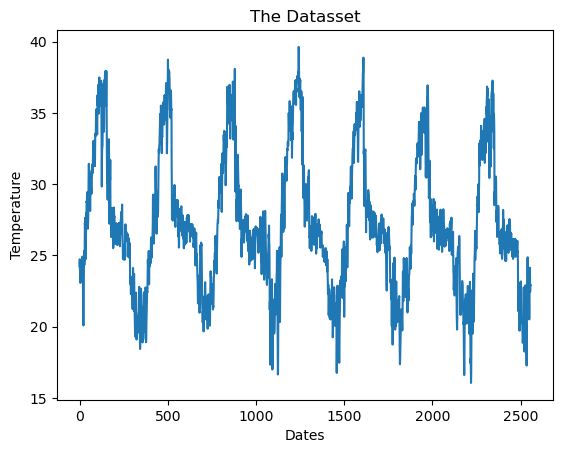

In [6]:
plt.title("The Datasset")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(np.array(A_data["Index"]),np.array(A_data["T2M"]))

# Splitting in test adn training dataset

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
train=A_data_test.iloc[:-30]
test=A_data_test.iloc[-30:]

In [8]:
from statsmodels.tsa.stattools import adfuller
dfa=adfuller(A_data_test)
print("The p-value of the dataset is:",dfa[1])

The p-value of the dataset is: 0.022812229530970562


In [9]:
#pip install pmdarima

In [10]:
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
fit=auto_arima(A_data_test["T2M"],trace=True,suppress_warning=True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6652.419, Time=1.93 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6825.055, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6783.547, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6770.381, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6823.056, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6665.720, Time=2.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6650.686, Time=1.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6765.262, Time=0.87 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6729.190, Time=0.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6652.420, Time=1.57 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6693.601, Time=0.62 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6653.165, Time=2.80 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6648.688, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6763.263, Time=0.38 sec
 ARIMA(2,1,0)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2557
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -3320.344
Date:                Sat, 04 Mar 2023   AIC                           6648.688
Time:                        18:54:06   BIC                           6672.072
Sample:                             0   HQIC                          6657.168
                               - 2557                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8696      0.035     25.173      0.000       0.802       0.937
ar.L2         -0.2472      0.015    -15.967      0.000      -0.278      -0.217
ma.L1         -0.7593      0.034    -22.358      0.000      -0.826      -0.693
sigma2         0.7867      0.014     55.298      0.000       0.759       0.815
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1063.01
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                            -0.67
Prob(H) (two-sided):                  0.05   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The training data is:


,T2M
Date,
2016-01-01,24.23
2016-02-01,24.73
2016-03-01,24.08
2016-04-01,23.12
2016-05-01,23.07
...,...
2022-11-27,18.26
2022-11-28,18.91
2022-11-29,19.89


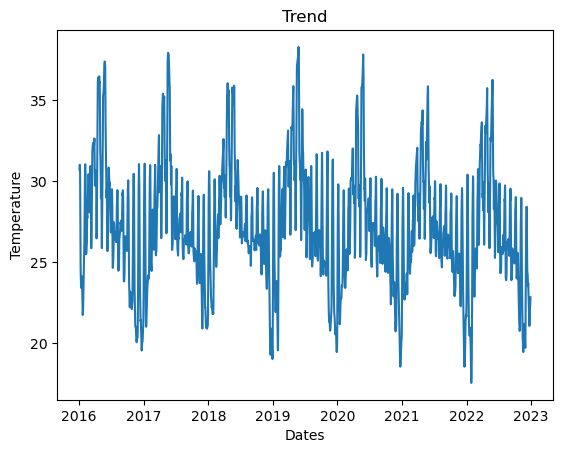

In [11]:
A_data_test.sort_index(inplace=True)
decompose = seasonal_decompose(A_data_test)
trend=decompose.trend
seasonal=decompose.seasonal
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.title("Trend")
plt.plot(trend)
print("The training data is:")
train

In [12]:
from statsmodels.tsa.arima.model import ARIMA 
model =ARIMA(train,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2527
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -3301.481
Date:                          Sat, 04 Mar 2023   AIC                           6614.963
Time:                                  18:57:28   BIC                           6649.898
Sample:                                       0   HQIC                          6627.647
                                         - 2527                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8571      0.036     23.803      0.000       0.787       0.928
ar.L2         -0.2436      0.016    -15.427      0.000      -0.275      -0.213
ma.L1         -0.7525      0.035    -21.520      0.000      -0.821      -0.684
ar.S.L30       0.0350      0.020      1.730      0.084      -0.005       0.075
ma.S.L30      -0.9986      0.135     -7.387      0.000      -1.264      -0.734
sigma2         0.7838      0.104      7.556      0.000       0.580       0.987
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               958.34
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                            -0.63
Prob(H) (two-sided):                  0.07   Kurtosis:                         5.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'Predicted values for the month of December 2022')

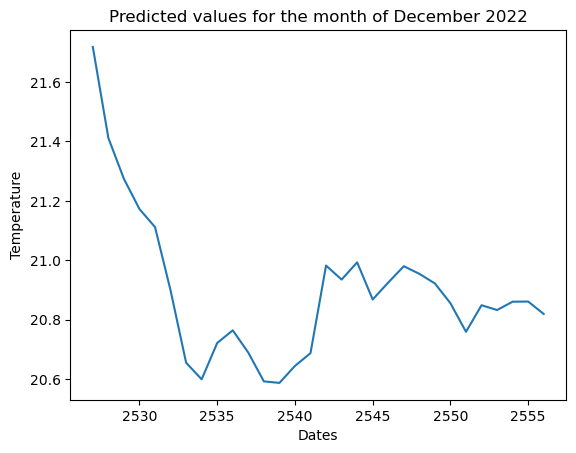

In [13]:
starts=len(train)
ends=len(train)+len(test)-1
pred=model_fit.predict(start=starts,end=ends,typ='levels')
plt.plot(pred)
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.title("Predicted values for the month of December 2022")

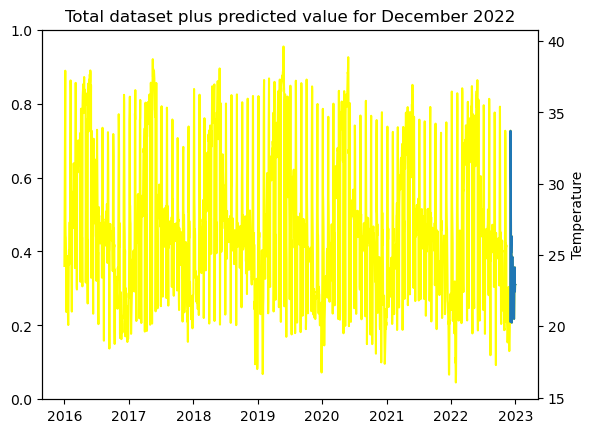

In [14]:
res=pd.DataFrame(pred)
res.columns=["T2M"]
final_data =pd.DataFrame(train)
pred_data=final_data.append(res)
fig,ax1=plt.subplots()
ax2=ax1.twinx()
#curve1=ax1.plot(pred_data,label='predicted Temp',color='black')
curve2=ax2.plot(A_data_test,label="Actual Temp",color='yellow')
plt.plot(A_data_test[-30:])
#plt.plot(pred)
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.title("Total dataset plus predicted value for December 2022")
plt.plot()
plt.show()

# Performance of the model

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
L=[]
for i in pred:
    L.append(i)
l=list(test["T2M"])
rmse=sqrt(mean_squared_error(pred,test["T2M"]))
ame=mean_absolute_error(pred,test["T2M"])
print("Average Temperature         : ",A_data_test['T2M'].mean())
print("Root mean Square value      : ",rmse)
print("Mean absolute Error         : ",ame)

Average Temperature         :  27.246730543605917
Root mean Square value      :  2.1046582473212494
Mean absolute Error         :  1.6700765620109181


# Forecasting for the year 2023

# Predictions for January

In [17]:
#Since Jan has 31 days we use 31 in seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. Jan 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2557
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -5864.260
Date:                          Sat, 04 Mar 2023   AIC                          11740.519
Time:                                  19:18:59   BIC                          11775.523
Sample:                              01-01-2016   HQIC                         11753.221
                                   - 12-31-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6664      0.017     39.621      0.000       0.633       0.699
ar.L2         -0.0674      0.017     -3.932      0.000      -0.101      -0.034
ma.L1         -0.9503      0.007   -140.913      0.000      -0.963      -0.937
ar.S.L31       0.5157      0.016     31.693      0.000       0.484       0.548
ma.S.L31      -0.9999      1.838     -0.544      0.587      -4.603       2.603
sigma2         5.8486     10.712      0.546      0.585     -15.146      26.843
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4624.02
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.16
Prob(H) (two-sided):                  0.07   Kurtosis:                         9.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of Jan 2023 is:",pred_new)

The predicted Temperature values of each day of Jan 2023 is: 2023-01-01    23.056980
2023-01-02    22.384297
2023-01-03    26.267254
2023-01-04    28.978275
2023-01-05    27.407965
2023-01-06    27.117428
2023-01-07    24.824557
2023-01-08    25.265531
2023-01-09    25.578489
2023-01-10    25.404378
2023-01-11    22.218204
2023-01-12    23.909328
2023-01-13    24.263178
2023-01-14    24.549086
2023-01-15    24.513958
2023-01-16    24.265905
2023-01-17    23.756341
2023-01-18    22.758621
2023-01-19    22.310334
2023-01-20    22.729857
2023-01-21    22.566479
2023-01-22    22.891986
2023-01-23    22.450930
2023-01-24    21.969989
2023-01-25    22.276521
2023-01-26    23.076499
2023-01-27    23.990230
2023-01-28    24.135651
2023-01-29    23.227704
2023-01-30    23.442016
2023-01-31    23.448063
Freq: D, Name: predicted_mean, dtype: float64


In [19]:
#Combining the pred Jan2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

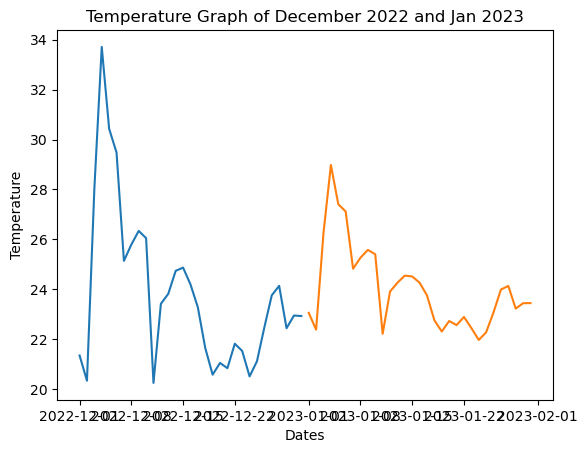

In [20]:
plt.title("Temperature Graph of December 2022 and Jan 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

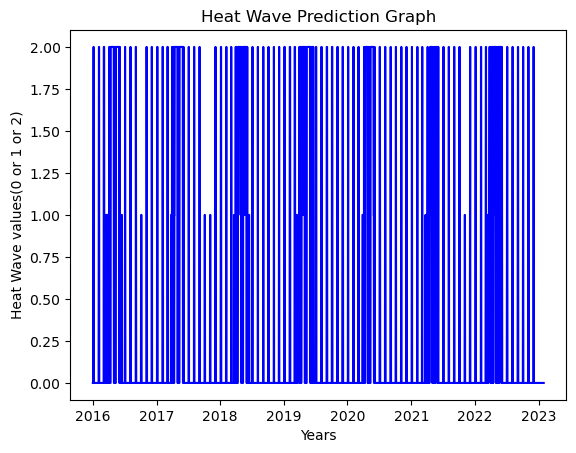

In [21]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [22]:
pred_data_Jan

,T2M,HWP
2016-01-01,24.230000,0
2016-01-02,27.040000,0
2016-01-03,28.120000,0
2016-01-04,33.370000,1
2016-01-05,36.780000,2
...,...,...
2023-01-27,23.990230,0
2023-01-28,24.135651,0
2023-01-29,23.227704,0
2023-01-30,23.442016,0


In [23]:
#Updating the original dataset to the combined data

A_data_test=pred_data
A_data_test.tail()

,T2M
2023-01-27,23.990230
2023-01-28,24.135651
2023-01-29,23.227704
2023-01-30,23.442016
2023-01-31,23.448063


# Predictions for February

In [24]:
#Since Feb has 28 days we use 28 in seasonal order as we need 28 outputs and we need to forecast the next 28 days ie. Feb 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,28))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2588
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 28)   Log Likelihood               -6224.841
Date:                          Sat, 04 Mar 2023   AIC                          12461.681
Time:                                  19:19:47   BIC                          12496.766
Sample:                              01-01-2016   HQIC                         12474.404
                                   - 01-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8755      0.017     52.830      0.000       0.843       0.908
ar.L2         -0.2512      0.019    -13.291      0.000      -0.288      -0.214
ma.L1         -0.9466      0.008   -114.688      0.000      -0.963      -0.930
ar.S.L28      -0.0106      0.019     -0.557      0.578      -0.048       0.027
ma.S.L28      -1.0000     14.626     -0.068      0.945     -29.666      27.666
sigma2         7.2196    105.582      0.068      0.945    -199.717     214.157
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              2544.58
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.43
Prob(H) (two-sided):                  0.10   Kurtosis:                         7.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
pred_new =model_fit.forecast(28)
print("The predicted Temperature values of each day of Feb 2023 are:",pred_new)

The predicted Temperature values of each day of Feb 2023 are: 2023-02-01    23.588115
2023-02-02    23.299941
2023-02-03    22.720447
2023-02-04    22.591340
2023-02-05    22.453789
2023-02-06    22.147540
2023-02-07    22.059224
2023-02-08    21.869615
2023-02-09    21.714985
2023-02-10    21.857973
2023-02-11    21.997959
2023-02-12    22.057605
2023-02-13    22.321032
2023-02-14    22.538418
2023-02-15    23.029483
2023-02-16    23.350492
2023-02-17    23.300017
2023-02-18    23.652151
2023-02-19    23.714579
2023-02-20    23.841834
2023-02-21    24.145151
2023-02-22    24.158985
2023-02-23    24.172492
2023-02-24    24.334603
2023-02-25    24.468769
2023-02-26    24.222932
2023-02-27    23.828396
2023-02-28    23.954788
Freq: D, Name: predicted_mean, dtype: float64


In [26]:
#Combining the pred Feb2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

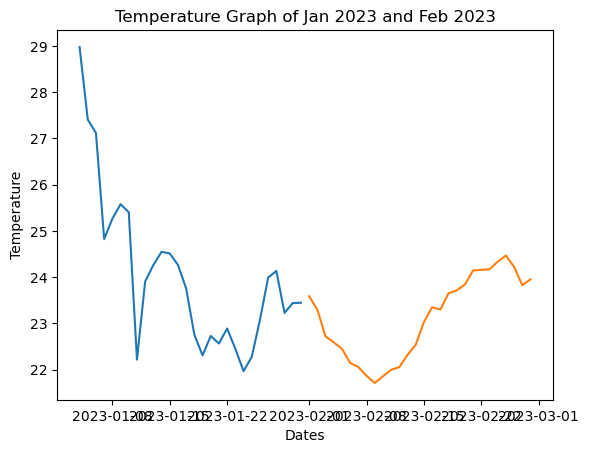

In [27]:
plt.title("Temperature Graph of Jan 2023 and Feb 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-28:])
plt.plot(pred_data[-28:])

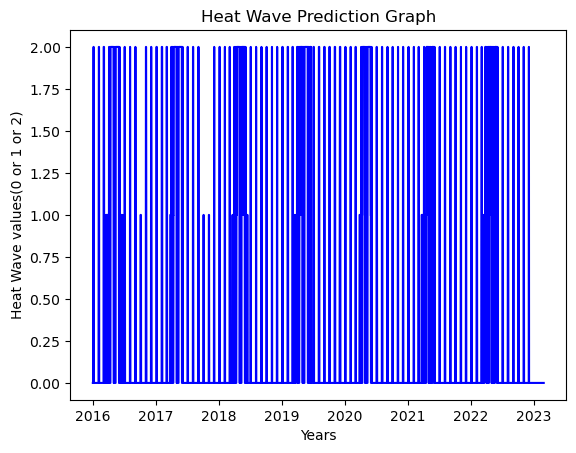

In [28]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [29]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-02-24,24.334603
2023-02-25,24.468769
2023-02-26,24.222932
2023-02-27,23.828396
2023-02-28,23.954788


# Predictions for March

In [30]:
#Since March has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. March 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2616
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -5972.865
Date:                          Sat, 04 Mar 2023   AIC                          11957.729
Time:                                  19:20:53   BIC                          11992.872
Sample:                              01-01-2016   HQIC                         11970.466
                                   - 02-28-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6685      0.016     40.597      0.000       0.636       0.701
ar.L2         -0.0675      0.017     -4.023      0.000      -0.100      -0.035
ma.L1         -0.9506      0.007   -144.480      0.000      -0.963      -0.938
ar.S.L31       0.5134      0.016     32.356      0.000       0.482       0.545
ma.S.L31      -0.9998      1.272     -0.786      0.432      -3.492       1.492
sigma2         5.7252      7.242      0.791      0.429      -8.469      19.919
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              5002.61
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                            -0.16
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-03-01    23.382322
2023-03-02    23.386487
2023-03-03    23.372995
2023-03-04    23.389327
2023-03-05    23.287262
2023-03-06    22.986721
2023-03-07    22.745629
2023-03-08    22.835403
2023-03-09    22.891982
2023-03-10    22.814457
2023-03-11    22.822465
2023-03-12    22.771262
2023-03-13    22.824383
2023-03-14    22.723808
2023-03-15    22.801418
2023-03-16    23.084461
2023-03-17    23.009741
2023-03-18    23.166342
2023-03-19    23.433067
2023-03-20    23.374869
2023-03-21    23.409366
2023-03-22    23.547543
2023-03-23    23.787538
2023-03-24    23.892822
2023-03-25    23.719433
2023-03-26    23.440144
2023-03-27    23.572899
2023-03-28    23.633531
2023-03-29    23.597781
2023-03-30    23.637389
2023-03-31    23.652749
Freq: D, Name: predicted_mean, dtype: float64


In [32]:
#Combining the pred March2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

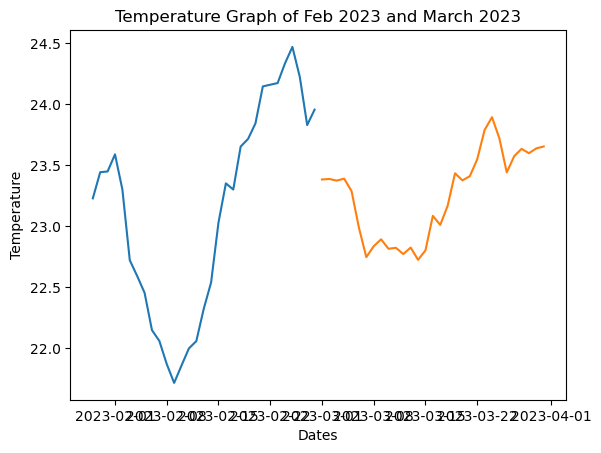

In [33]:
plt.title("Temperature Graph of Feb 2023 and March 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

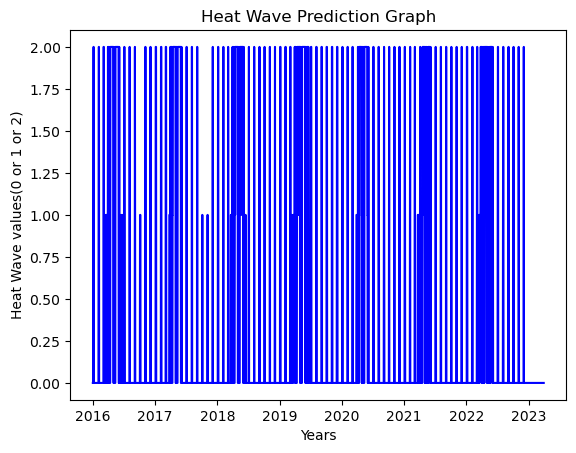

In [34]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [35]:

A_data_test=pred_data
A_data_test.tail()

,T2M
2023-03-27,23.572899
2023-03-28,23.633531
2023-03-29,23.597781
2023-03-30,23.637389
2023-03-31,23.652749





# Predictions of April

In [36]:
#Since April has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. April 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2647
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -6129.732
Date:                          Sat, 04 Mar 2023   AIC                          12271.464
Time:                                  19:21:49   BIC                          12306.681
Sample:                              01-01-2016   HQIC                         12284.220
                                   - 03-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6697      0.015     43.831      0.000       0.640       0.700
ar.L2         -0.0823      0.019     -4.241      0.000      -0.120      -0.044
ma.L1         -0.9501      0.008   -124.433      0.000      -0.965      -0.935
ar.S.L30       0.4457      0.013     33.891      0.000       0.420       0.471
ma.S.L30      -0.9999      1.898     -0.527      0.598      -4.720       2.720
sigma2         6.0953     11.564      0.527      0.598     -16.570      28.761
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3629.32
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of April 2023 are:",pred_new)
    

The predicted Temperature values of each day of April 2023 are: 2023-04-01    23.575035
2023-04-02    23.586035
2023-04-03    23.744320
2023-04-04    23.552634
2023-04-05    23.079814
2023-04-06    22.630044
2023-04-07    22.825742
2023-04-08    23.045721
2023-04-09    23.015809
2023-04-10    22.915464
2023-04-11    22.702503
2023-04-12    22.902177
2023-04-13    22.956396
2023-04-14    23.023602
2023-04-15    23.337379
2023-04-16    23.280524
2023-04-17    23.313587
2023-04-18    23.565724
2023-04-19    23.443948
2023-04-20    23.330894
2023-04-21    23.234276
2023-04-22    23.403260
2023-04-23    23.658584
2023-04-24    23.620978
2023-04-25    23.321137
2023-04-26    23.116586
2023-04-27    23.228873
2023-04-28    23.614056
2023-04-29    23.870643
2023-04-30    23.700401
Freq: D, Name: predicted_mean, dtype: float64


In [38]:
#Combining the pred April2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

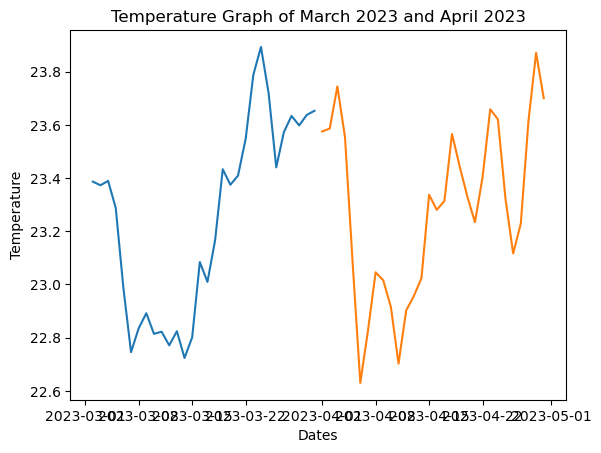

In [39]:
plt.title("Temperature Graph of March 2023 and April 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])

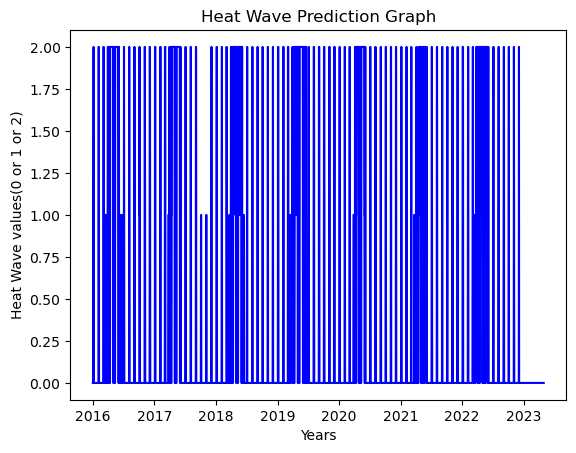

In [40]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')


In [41]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-04-26,23.116586
2023-04-27,23.228873
2023-04-28,23.614056
2023-04-29,23.870643
2023-04-30,23.700401


# Predictions for May

In [42]:
#Since May has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. May 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2677
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6082.256
Date:                          Sat, 04 Mar 2023   AIC                          12176.513
Time:                                  19:23:38   BIC                          12211.795
Sample:                              01-01-2016   HQIC                         12189.285
                                   - 04-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6686      0.016     41.545      0.000       0.637       0.700
ar.L2         -0.0677      0.016     -4.128      0.000      -0.100      -0.036
ma.L1         -0.9505      0.006   -147.724      0.000      -0.963      -0.938
ar.S.L31       0.5131      0.015     33.113      0.000       0.483       0.543
ma.S.L31      -0.9999      1.999     -0.500      0.617      -4.918       2.918
sigma2         5.5936     11.144      0.502      0.616     -16.248      27.435
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              5469.42
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of May 2023 are:",pred_new)

The predicted Temperature values of each day of May 2023 are: 2023-05-01    23.572426
2023-05-02    23.474580
2023-05-03    23.418124
2023-05-04    23.510207
2023-05-05    23.368722
2023-05-06    23.174465
2023-05-07    22.941558
2023-05-08    22.874961
2023-05-09    23.149737
2023-05-10    23.345932
2023-05-11    23.262290
2023-05-12    23.254986
2023-05-13    23.388005
2023-05-14    23.396107
2023-05-15    23.261360
2023-05-16    23.471966
2023-05-17    23.586732
2023-05-18    23.420178
2023-05-19    23.456997
2023-05-20    23.492389
2023-05-21    23.401510
2023-05-22    23.205888
2023-05-23    23.398693
2023-05-24    23.703968
2023-05-25    23.633703
2023-05-26    23.298892
2023-05-27    22.910118
2023-05-28    23.017234
2023-05-29    23.210687
2023-05-30    23.434952
2023-05-31    23.585095
Freq: D, Name: predicted_mean, dtype: float64


In [44]:
#Combining the pred May2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

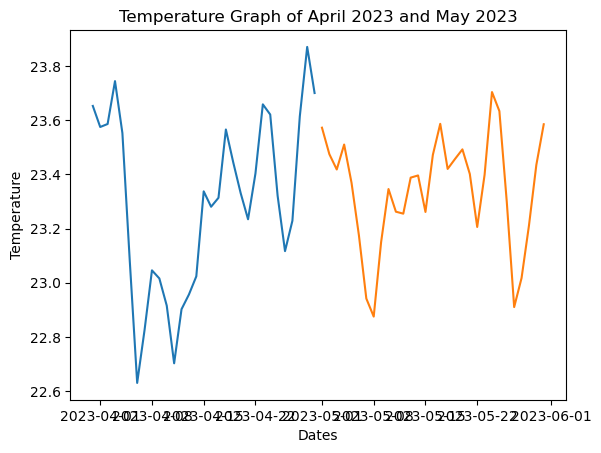

In [45]:
plt.title("Temperature Graph of April 2023 and May 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

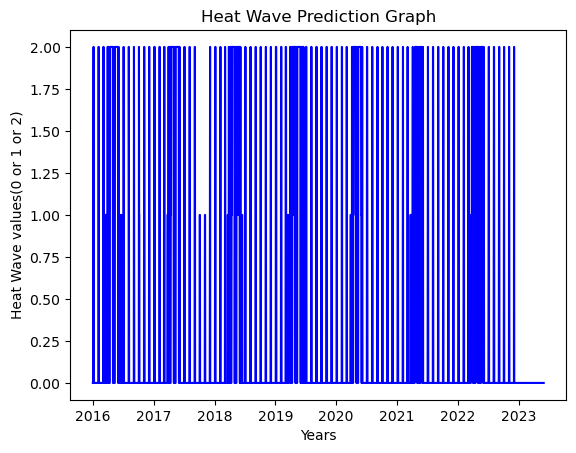

In [46]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')


In [47]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-05-27,22.910118
2023-05-28,23.017234
2023-05-29,23.210687
2023-05-30,23.434952
2023-05-31,23.585095


# Predictions for June

In [48]:
#Since June has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. June 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2708
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -6241.070
Date:                          Sat, 04 Mar 2023   AIC                          12494.140
Time:                                  19:24:45   BIC                          12529.495
Sample:                              01-01-2016   HQIC                         12506.931
                                   - 05-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6699      0.015     44.876      0.000       0.641       0.699
ar.L2         -0.0826      0.019     -4.352      0.000      -0.120      -0.045
ma.L1         -0.9501      0.007   -127.543      0.000      -0.965      -0.936
ar.S.L30       0.4454      0.013     34.667      0.000       0.420       0.471
ma.S.L30      -0.9999      1.934     -0.517      0.605      -4.791       2.791
sigma2         5.9569     11.519      0.517      0.605     -16.620      28.533
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3971.44
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-06-01    23.605923
2023-06-02    23.737743
2023-06-03    23.637990
2023-06-04    23.240964
2023-06-05    22.815966
2023-06-06    22.862898
2023-06-07    23.024220
2023-06-08    23.154372
2023-06-09    23.141571
2023-06-10    22.916283
2023-06-11    23.086156
2023-06-12    23.244611
2023-06-13    23.280270
2023-06-14    23.402932
2023-06-15    23.476010
2023-06-16    23.491866
2023-06-17    23.546496
2023-06-18    23.469040
2023-06-19    23.358644
2023-06-20    23.161090
2023-06-21    23.132366
2023-06-22    23.425330
2023-06-23    23.604071
2023-06-24    23.399885
2023-06-25    22.987111
2023-06-26    22.893562
2023-06-27    23.337549
2023-06-28    23.661040
2023-06-29    23.588963
2023-06-30    23.568621
Freq: D, Name: predicted_mean, dtype: float64


In [50]:
#Combining the pred June2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

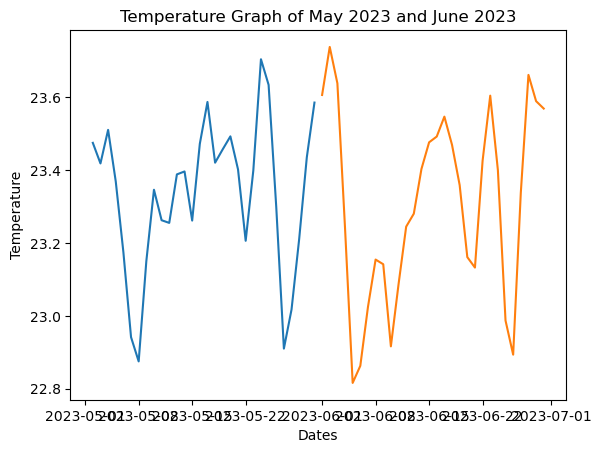

In [51]:
plt.title("Temperature Graph of May 2023 and June 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])
    

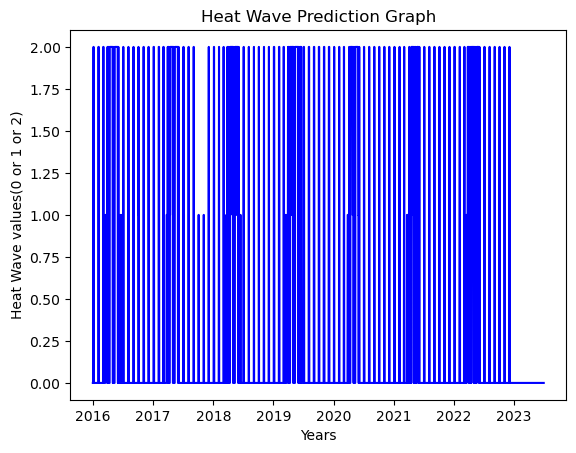

In [52]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')


In [53]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-06-26,22.893562
2023-06-27,23.337549
2023-06-28,23.661040
2023-06-29,23.588963
2023-06-30,23.568621


# Predictions for July

In [54]:
#Since July has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. July 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2738
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6191.023
Date:                          Sat, 04 Mar 2023   AIC                          12394.046
Time:                                  19:26:28   BIC                          12429.466
Sample:                              01-01-2016   HQIC                         12406.853
                                   - 06-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6688      0.016     42.526      0.000       0.638       0.700
ar.L2         -0.0678      0.016     -4.229      0.000      -0.099      -0.036
ma.L1         -0.9506      0.006   -151.484      0.000      -0.963      -0.938
ar.S.L31       0.5127      0.015     33.874      0.000       0.483       0.542
ma.S.L31      -0.9999      2.447     -0.409      0.683      -5.796       3.796
sigma2         5.4663     13.342      0.410      0.682     -20.683      31.615
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              5957.49
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of July 2023 are:",pred_new)

The predicted Temperature values of each day of July 2023 are: 2023-07-01    23.733899
2023-07-02    23.611047
2023-07-03    23.604636
2023-07-04    23.478796
2023-07-05    23.274014
2023-07-06    23.005650
2023-07-07    23.077079
2023-07-08    23.159643
2023-07-09    23.062258
2023-07-10    23.213908
2023-07-11    23.304029
2023-07-12    23.361555
2023-07-13    23.545468
2023-07-14    23.593606
2023-07-15    23.638251
2023-07-16    23.509751
2023-07-17    23.565948
2023-07-18    23.736394
2023-07-19    23.515116
2023-07-20    23.365467
2023-07-21    23.358665
2023-07-22    23.311634
2023-07-23    23.321530
2023-07-24    23.519062
2023-07-25    23.582891
2023-07-26    23.316652
2023-07-27    23.090394
2023-07-28    23.044203
2023-07-29    23.262004
2023-07-30    23.219028
2023-07-31    23.298804
Freq: D, Name: predicted_mean, dtype: float64


In [56]:
#Combining the pred July2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

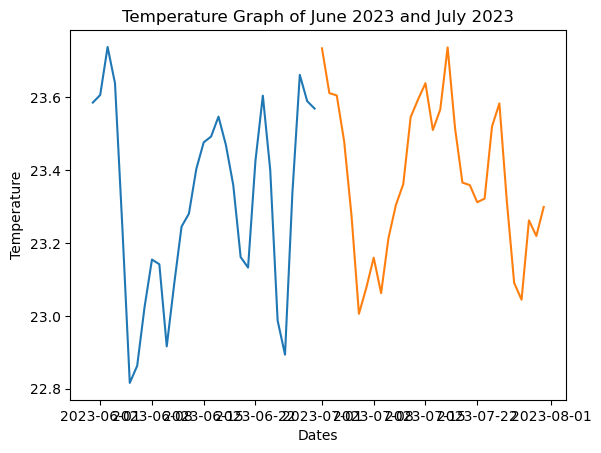

In [57]:
plt.title("Temperature Graph of June 2023 and July 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

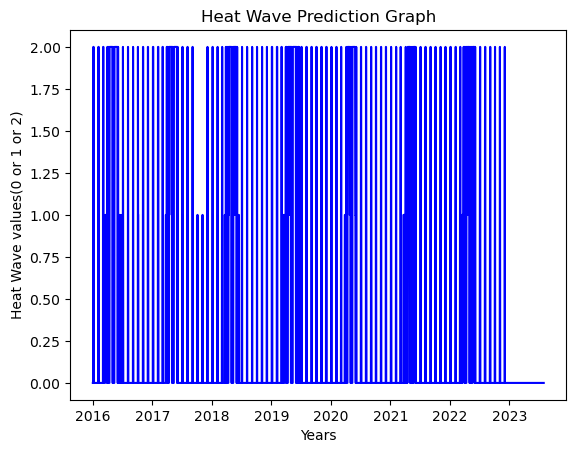

In [58]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [59]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-07-27,23.090394
2023-07-28,23.044203
2023-07-29,23.262004
2023-07-30,23.219028
2023-07-31,23.298804


# Predictions for August

In [60]:
#Since August has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. August 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2769
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6245.923
Date:                          Sat, 04 Mar 2023   AIC                          12503.846
Time:                                  19:27:56   BIC                          12539.334
Sample:                              01-01-2016   HQIC                         12516.671
                                   - 07-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6689      0.016     43.007      0.000       0.638       0.699
ar.L2         -0.0679      0.016     -4.279      0.000      -0.099      -0.037
ma.L1         -0.9506      0.006   -153.130      0.000      -0.963      -0.938
ar.S.L31       0.5127      0.015     34.256      0.000       0.483       0.542
ma.S.L31      -0.9999      2.489     -0.402      0.688      -5.879       3.879
sigma2         5.4057     13.422      0.403      0.687     -20.900      31.712
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6223.92
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-08-01    23.619647
2023-08-02    23.506707
2023-08-03    23.475305
2023-08-04    23.361105
2023-08-05    23.268493
2023-08-06    23.087838
2023-08-07    23.175859
2023-08-08    23.220244
2023-08-09    23.007412
2023-08-10    23.244015
2023-08-11    23.496178
2023-08-12    23.496302
2023-08-13    23.693371
2023-08-14    23.747963
2023-08-15    23.752646
2023-08-16    23.520829
2023-08-17    23.597715
2023-08-18    23.827537
2023-08-19    23.532533
2023-08-20    23.362764
2023-08-21    23.453749
2023-08-22    23.397334
2023-08-23    23.262121
2023-08-24    23.469287
2023-08-25    23.670512
2023-08-26    23.479393
2023-08-27    23.185105
2023-08-28    22.887626
2023-08-29    23.051247
2023-08-30    23.023189
2023-08-31    23.154289
Freq: D, Name: predicted_mean, dtype: float64


In [62]:
#Combining the pred August2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

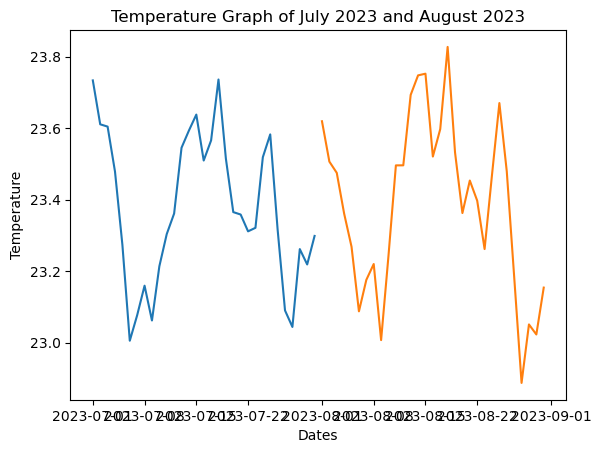

In [63]:
plt.title("Temperature Graph of July 2023 and August 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

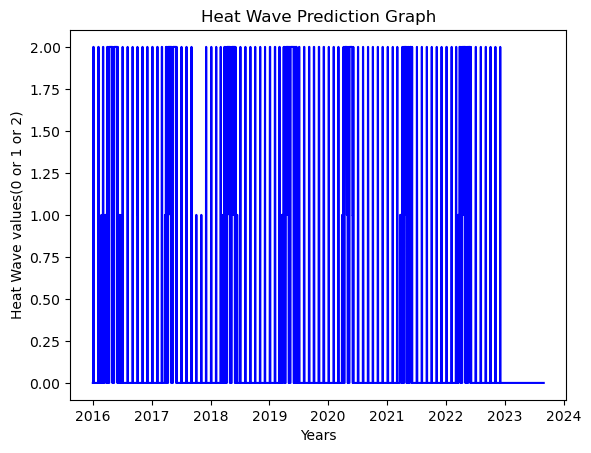

In [64]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [65]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-08-27,23.185105
2023-08-28,22.887626
2023-08-29,23.051247
2023-08-30,23.023189
2023-08-31,23.154289


# Predictions for September

In [66]:
#Since Saptember has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. September 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2800
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -6407.732
Date:                          Sat, 04 Mar 2023   AIC                          12827.463
Time:                                  19:29:26   BIC                          12863.021
Sample:                              01-01-2016   HQIC                         12840.306
                                   - 08-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6702      0.014     46.439      0.000       0.642       0.698
ar.L2         -0.0829      0.018     -4.516      0.000      -0.119      -0.047
ma.L1         -0.9502      0.007   -132.032      0.000      -0.964      -0.936
ar.S.L30       0.4450      0.012     35.838      0.000       0.421       0.469
ma.S.L30      -0.9999      2.393     -0.418      0.676      -5.691       3.691
sigma2         5.7598     13.782      0.418      0.676     -21.252      32.771
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4527.02
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of March 2023 are:",pred_new)

The predicted Temperature values of each day of March 2023 are: 2023-09-01    23.200207
2023-09-02    23.031113
2023-09-03    22.743620
2023-09-04    22.896896
2023-09-05    23.026714
2023-09-06    23.087188
2023-09-07    23.015297
2023-09-08    22.739405
2023-09-09    23.018208
2023-09-10    23.230717
2023-09-11    23.263527
2023-09-12    23.532189
2023-09-13    23.536784
2023-09-14    23.503598
2023-09-15    23.524250
2023-09-16    23.468710
2023-09-17    23.449067
2023-09-18    23.160861
2023-09-19    23.140825
2023-09-20    23.383476
2023-09-21    23.398884
2023-09-22    23.169980
2023-09-23    23.008324
2023-09-24    23.176848
2023-09-25    23.474644
2023-09-26    23.571331
2023-09-27    23.269010
2023-09-28    23.257936
2023-09-29    23.290343
2023-09-30    23.513875
Freq: D, Name: predicted_mean, dtype: float64


In [68]:
#Combining the pred September2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

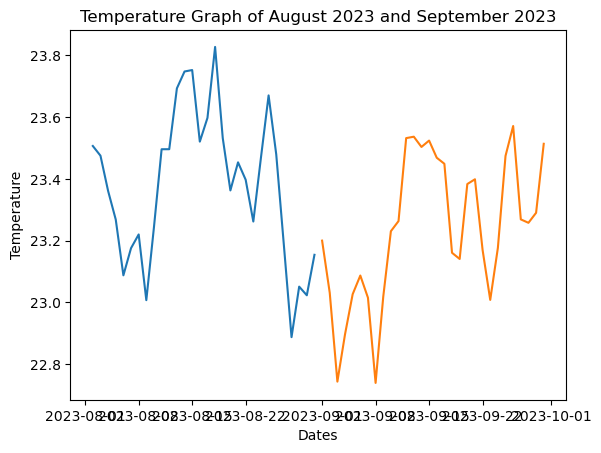

In [69]:
plt.title("Temperature Graph of August 2023 and September 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")

plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])

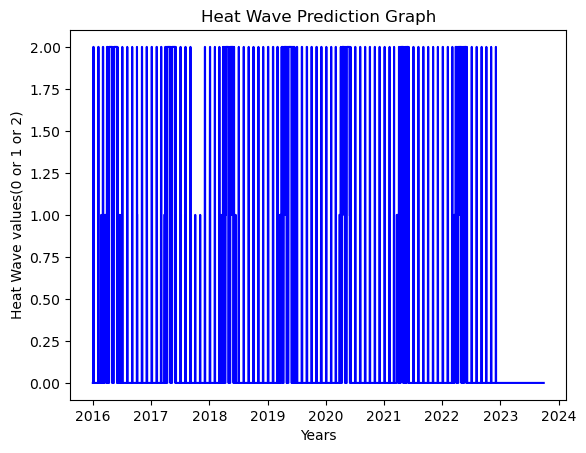

In [70]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [71]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-09-26,23.571331
2023-09-27,23.269010
2023-09-28,23.257936
2023-09-29,23.290343
2023-09-30,23.513875


# Prediction for October

In [72]:
#Since October has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. October 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2830
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6353.604
Date:                          Sat, 04 Mar 2023   AIC                          12719.208
Time:                                  19:31:05   BIC                          12754.828
Sample:                              01-01-2016   HQIC                         12732.066
                                   - 09-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6690      0.015     43.961      0.000       0.639       0.699
ar.L2         -0.0680      0.016     -4.381      0.000      -0.098      -0.038
ma.L1         -0.9506      0.006   -156.553      0.000      -0.963      -0.939
ar.S.L31       0.5125      0.015     35.011      0.000       0.484       0.541
ma.S.L31      -0.9998      1.204     -0.830      0.406      -3.359       1.360
sigma2         5.2892      6.335      0.835      0.404      -7.127      17.705
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6760.21
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of October 2023 are:",pred_new)

The predicted Temperature values of each day of October 2023 are: 2023-10-01    23.442415
2023-10-02    23.528647
2023-10-03    23.293382
2023-10-04    23.061288
2023-10-05    23.063464
2023-10-06    23.128092
2023-10-07    23.109363
2023-10-08    23.117381
2023-10-09    22.972237
2023-10-10    22.956653
2023-10-11    23.222990
2023-10-12    23.442212
2023-10-13    23.553495
2023-10-14    23.656414
2023-10-15    23.668272
2023-10-16    23.660984
2023-10-17    23.468939
2023-10-18    23.505808
2023-10-19    23.494722
2023-10-20    23.306164
2023-10-21    23.341967
2023-10-22    23.443014
2023-10-23    23.291617
2023-10-24    23.068919
2023-10-25    23.260754
2023-10-26    23.582185
2023-10-27    23.579723
2023-10-28    23.246708
2023-10-29    22.971585
2023-10-30    23.039083
2023-10-31    23.150198
Freq: D, Name: predicted_mean, dtype: float64


In [74]:
#Combining the pred October2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

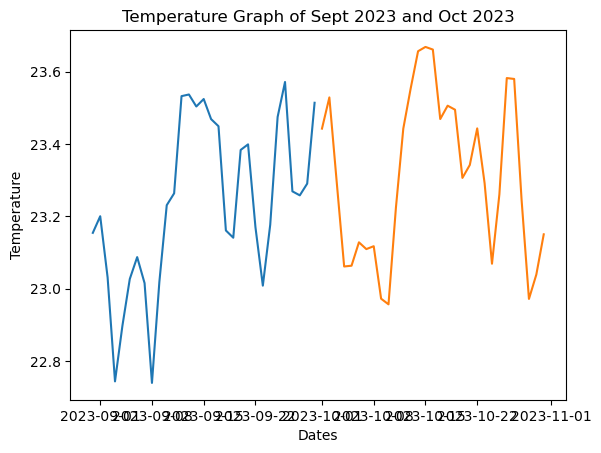

In [75]:
plt.title("Temperature Graph of Sept 2023 and Oct 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

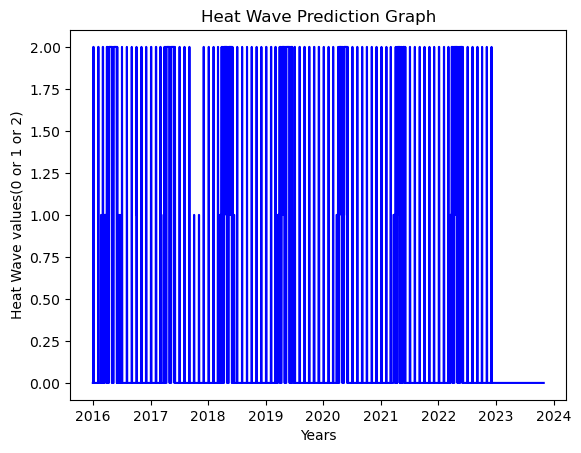

In [76]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [77]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-10-27,23.579723
2023-10-28,23.246708
2023-10-29,22.971585
2023-10-30,23.039083
2023-10-31,23.150198


# Prediction for November

In [78]:
#Since November has 30 days we use 30 as the seasonal order as we need 30 outputs and we need to forecast the next 30 days ie. Nomvember 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,30))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2861
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -6517.326
Date:                          Sat, 04 Mar 2023   AIC                          13046.652
Time:                                  19:32:09   BIC                          13082.341
Sample:                              01-01-2016   HQIC                         13059.528
                                   - 10-31-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6703      0.014     47.477      0.000       0.643       0.698
ar.L2         -0.0829      0.018     -4.618      0.000      -0.118      -0.048
ma.L1         -0.9502      0.007   -135.066      0.000      -0.964      -0.936
ar.S.L30       0.4448      0.012     36.613      0.000       0.421       0.469
ma.S.L30      -0.9999      2.896     -0.345      0.730      -6.676       4.676
sigma2         5.6361     16.318      0.345      0.730     -26.346      37.618
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4922.69
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
pred_new =model_fit.forecast(30)
print("The predicted Temperature values of each day of November 2023 are:",pred_new)

The predicted Temperature values of each day of November 2023 are: 2023-11-01    23.046109
2023-11-02    22.708337
2023-11-03    22.795350
2023-11-04    23.004213
2023-11-05    23.054594
2023-11-06    22.955737
2023-11-07    22.781310
2023-11-08    22.885787
2023-11-09    22.977022
2023-11-10    23.130537
2023-11-11    23.408254
2023-11-12    23.439377
2023-11-13    23.451445
2023-11-14    23.579338
2023-11-15    23.487394
2023-11-16    23.279356
2023-11-17    23.142102
2023-11-18    23.192121
2023-11-19    23.305355
2023-11-20    23.361689
2023-11-21    23.241615
2023-11-22    22.922079
2023-11-23    22.898153
2023-11-24    23.363187
2023-11-25    23.734437
2023-11-26    23.566472
2023-11-27    23.331923
2023-11-28    23.251045
2023-11-29    23.444319
2023-11-30    23.369636
Freq: D, Name: predicted_mean, dtype: float64


In [80]:
#Combining the pred November2023 data with the original dataset


res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

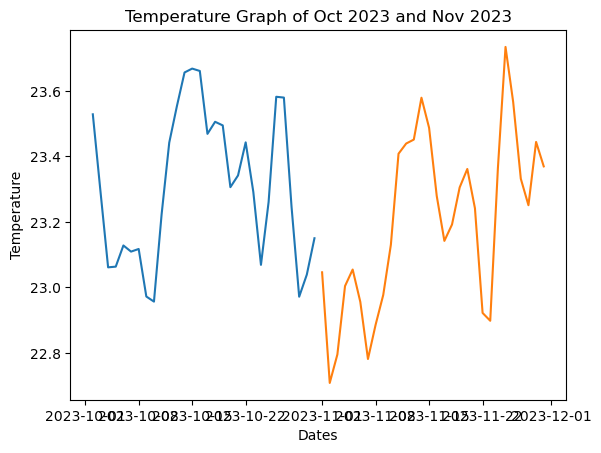

In [81]:

plt.title("Temperature Graph of Oct 2023 and Nov 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-30:])
plt.plot(pred_data[-30:])

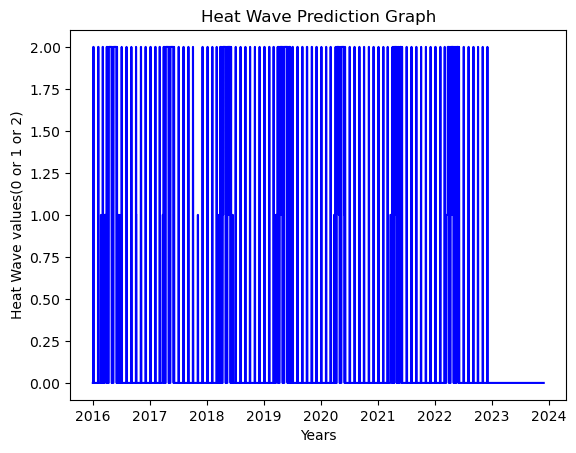

In [82]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [83]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-11-26,23.566472
2023-11-27,23.331923
2023-11-28,23.251045
2023-11-29,23.444319
2023-11-30,23.369636


# Prediction for December

In [84]:
#Since December has 31 days we use 31 as the seasonal order as we need 31 outputs and we need to forecast the next 31 days ie. December 2023

model =ARIMA(A_data_test,order=(2,1,1),seasonal_order=(1,1,1,31))
model_fit =model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                              T2M   No. Observations:                 2891
Model:             ARIMA(2, 1, 1)x(1, 1, 1, 31)   Log Likelihood               -6460.644
Date:                          Sat, 04 Mar 2023   AIC                          12933.288
Time:                                  19:34:03   BIC                          12969.037
Sample:                              01-01-2016   HQIC                         12946.178
                                   - 11-30-2023                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6692      0.015     44.928      0.000       0.640       0.698
ar.L2         -0.0681      0.015     -4.483      0.000      -0.098      -0.038
ma.L1         -0.9507      0.006   -160.137      0.000      -0.962      -0.939
ar.S.L31       0.5122      0.014     35.768      0.000       0.484       0.540
ma.S.L31      -0.9999      3.795     -0.263      0.792      -8.439       6.439
sigma2         5.1761     19.614      0.264      0.792     -33.267      43.619
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7323.86
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
pred_new =model_fit.forecast(31)
print("The predicted Temperature values of each day of December 2023 are:",pred_new)

The predicted Temperature values of each day of December 2023 are: 2023-12-01    23.221241
2023-12-02    23.129972
2023-12-03    23.111912
2023-12-04    23.069550
2023-12-05    23.128268
2023-12-06    23.096590
2023-12-07    23.052277
2023-12-08    22.917197
2023-12-09    23.019022
2023-12-10    23.065322
2023-12-11    22.989614
2023-12-12    23.289672
2023-12-13    23.505400
2023-12-14    23.485108
2023-12-15    23.651042
2023-12-16    23.631545
2023-12-17    23.505162
2023-12-18    23.272505
2023-12-19    23.344921
2023-12-20    23.539430
2023-12-21    23.393388
2023-12-22    23.242763
2023-12-23    23.167417
2023-12-24    23.121986
2023-12-25    23.227715
2023-12-26    23.525140
2023-12-27    23.602784
2023-12-28    23.428697
2023-12-29    23.211864
2023-12-30    23.047592
2023-12-31    23.058594
Freq: D, Name: predicted_mean, dtype: float64


In [86]:
#Combining the pred December2023 data with the original dataset

res=pd.DataFrame(pred_new)
res.columns=["T2M"]
final_data =pd.DataFrame(A_data_test)
pred_data=final_data.append(res)

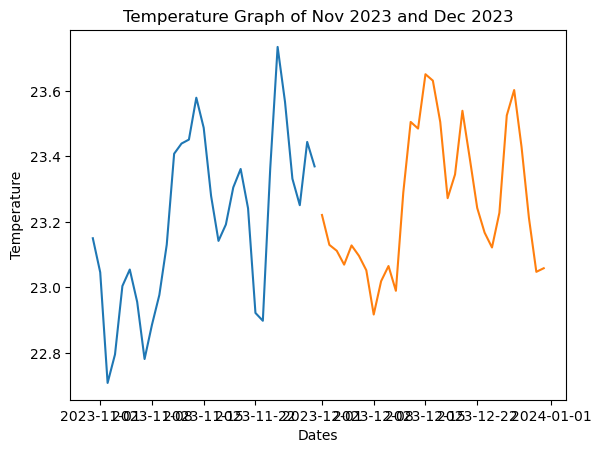

In [87]:
plt.title("Temperature Graph of Nov 2023 and Dec 2023")
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.plot(A_data_test[-31:])
plt.plot(pred_data[-31:])

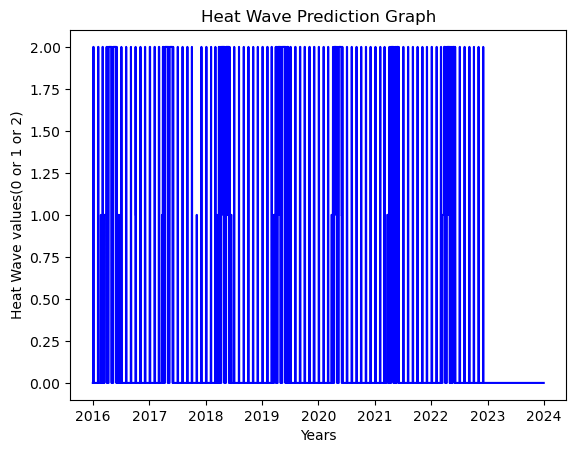

In [88]:
pred_data_Jan=pred_data[["T2M"]]
pred_data_Jan["HWP"]=Heat_wave_pred(pred_data_Jan["T2M"])
plt.title("Heat Wave Prediction Graph")
plt.xlabel("Years")
plt.ylabel("Heat Wave values(0 or 1 or 2)")
plt.plot(pred_data_Jan["HWP"],color='b')

In [89]:
A_data_test=pred_data
A_data_test.tail()

,T2M
2023-12-27,23.602784
2023-12-28,23.428697
2023-12-29,23.211864
2023-12-30,23.047592
2023-12-31,23.058594


In [90]:
print("The Average Mean Average Error across all 5 cities is:",1.7294)
print("The model fits the city of Khammam the best a we got the least AME value of",1.44896492)

The Average Mean Average Error across all 5 cities is: 1.7294
The model fits the city of Khammam the best a we got the least AME value of 1.44896492
